In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


#import all functions created in acquire , prepare & explore
import prepare
import acquire
import model
#import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read TELCO data from MySQL using the get_telco_data() function in acquire.py

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
#initial data summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [7]:
# Clean, Prep and Split df

In [ ]:
# Drop duplicate columns
df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [ ]:
# Drop null values stored as whitespace    
df['total_charges'] = df['total_charges'].str.strip()
df = df[df.total_charges != '']

In [ ]:
# Convert to correct datatype
df['total_charges'] = df.total_charges.astype(float)

In [ ]:
 # Convert binary categorical variables to numeric
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [ ]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)

In [ ]:
 # Concatenate dummy dataframe to original 
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
# Drop unnecessary columns
df.drop(columns=['gender','partner','dependents','phone_service', 'multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type'], inplace=True)

In [8]:
#combine all to a function and add to prepare.py
def prep_telco_data(df):
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype(float)
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.replace({'Yes': 1, 'No': 0})
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(columns=['gender','partner','dependents','phone_service', \
                     'multiple_lines','online_security','online_backup', \
                     'device_protection','tech_support','streaming_tv', \
                     'streaming_movies','paperless_billing'], inplace=True)
    return df

In [9]:
df = prep_telco_data(df)

In [10]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   churn                                  7032 non-null   object 
 5   contract_type                          7032 non-null   object 
 6   internet_service_type                  7032 non-null   object 
 7   payment_type                           7032 non-null   object 
 8   gender_encoded                         7032 non-null   int64  
 9   partner_encoded                        7032 non-null   int64  
 10  dependents_encoded                     7032 non-null   int64  
 11  phon

In [12]:
#split the data using train_validate_test() from prepare.py
train, validate, test = prepare.train_validate_test(df)

In [13]:
# validate and test to be out-of-sample

train.shape, validate.shape, test.shape

((3937, 35), (1688, 35), (1407, 35))

In [14]:
train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

In [15]:
#overall churn rate of train set
train.churn_encoded.mean()

0.2656845313690627

Text(0.5, 0, 'Churned')

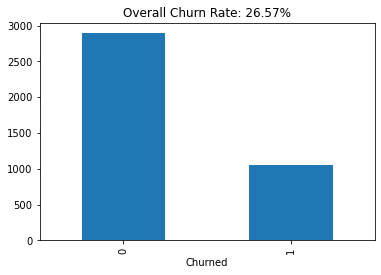

In [16]:
train.churn_encoded.value_counts().sort_index().plot.bar()
churn_rate = train.churn_encoded.mean()
plt.title(f"Overall Churn Rate: {churn_rate:.2%}")
plt.xlabel('Churned')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

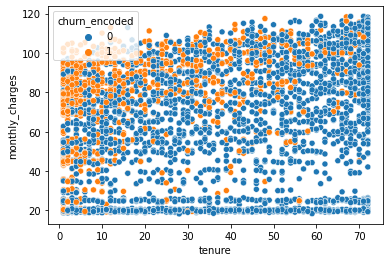

In [17]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="monthly_charges", hue="churn_encoded", data=train)

<AxesSubplot:xlabel='churn', ylabel='count'>

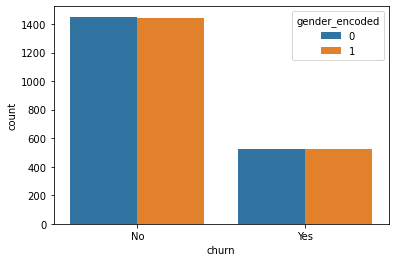

In [18]:
sns.countplot(x="churn", data=train, hue="gender_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

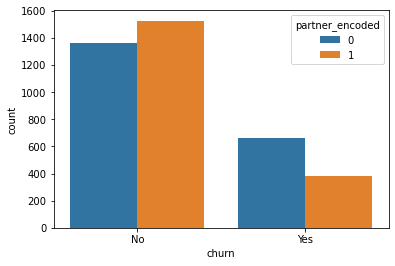

In [19]:
sns.countplot(x="churn", data=train, hue="partner_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

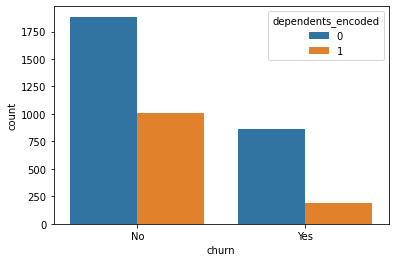

In [20]:
sns.countplot(x="churn", data=train, hue="dependents_encoded")

<AxesSubplot:xlabel='churn', ylabel='count'>

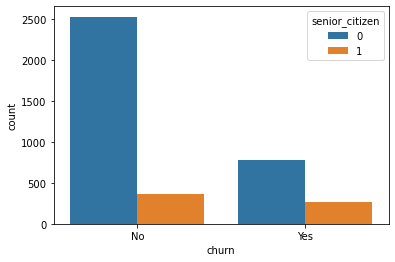

In [21]:
sns.countplot(x="churn", data=train, hue="senior_citizen")

<AxesSubplot:xlabel='churn', ylabel='count'>

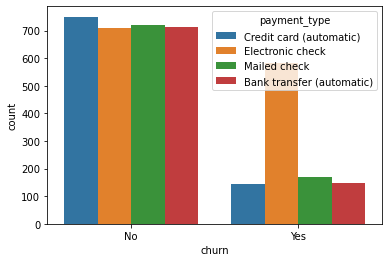

In [23]:
#electronic check has the highest rate of churn
sns.countplot(x="churn", data=train, hue="payment_type")

<AxesSubplot:xlabel='churn', ylabel='count'>

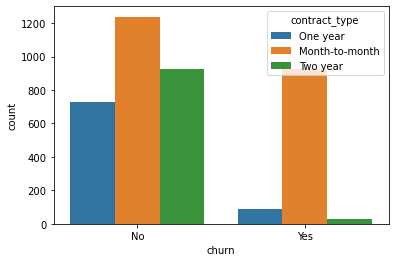

In [24]:
#month to month has the highest rate of churn
sns.countplot(x="churn", data=train, hue="contract_type")

<AxesSubplot:xlabel='tenure', ylabel='internet_service_type'>

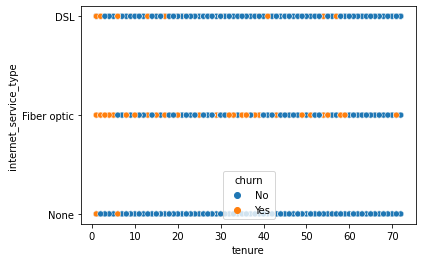

In [34]:
# Hue can hold a categorical or a continuous (recommend for categorical)
sns.scatterplot(x="tenure", y="internet_service_type", hue="churn", data=train)

<AxesSubplot:xlabel='monthly_charges', ylabel='count'>

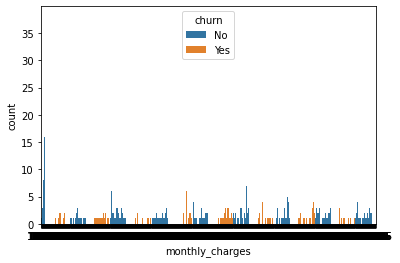

In [31]:
#fiber optic has the highest rate of churn
sns.countplot(x="monthly_charges", data=train, hue="churn") 

In [42]:
features = ['internet_service_type', 'contract_type', 'payment_type']

In [46]:
list(enumerate(features))

[(0, 'internet_service_type'),
 (1, 'contract_type'),
 (2, 'payment_type'),
 (3, 'phone_service_encoded')]

IndexError: index 3 is out of bounds for axis 0 with size 3

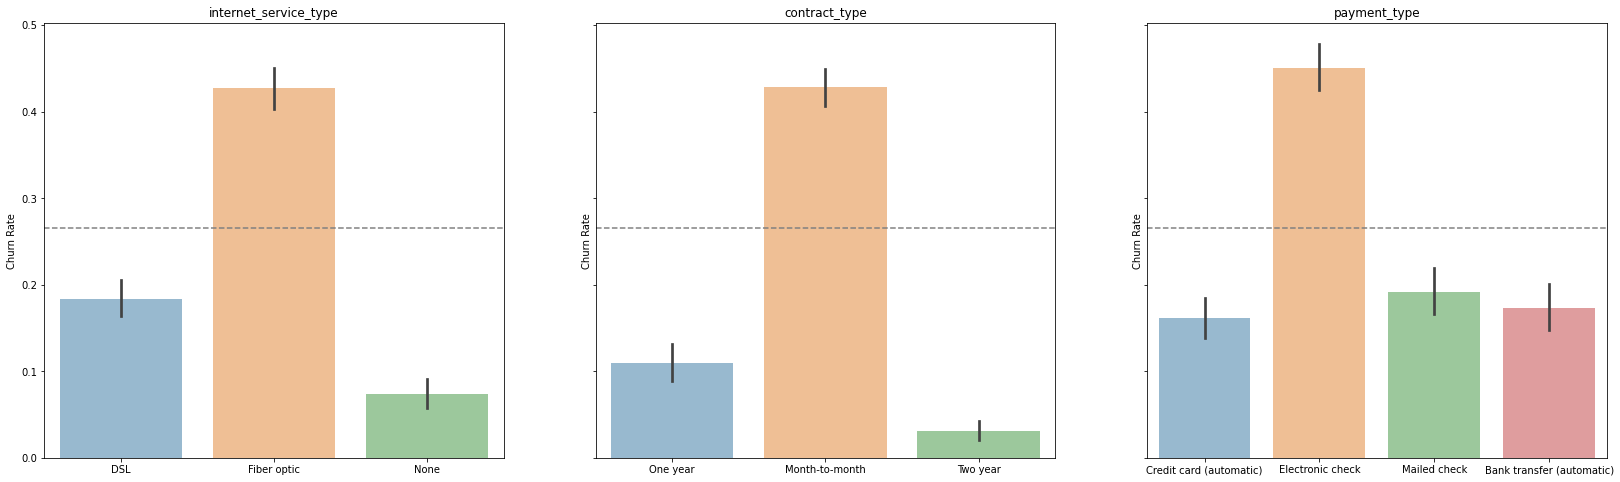

In [57]:
churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

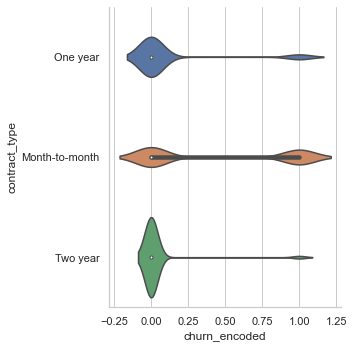

In [109]:
# Catplot with kind="count"
sns.set_theme(style="whitegrid")
sns.catplot(x="churn_encoded", y="contract_type", data=train, kind="violin")

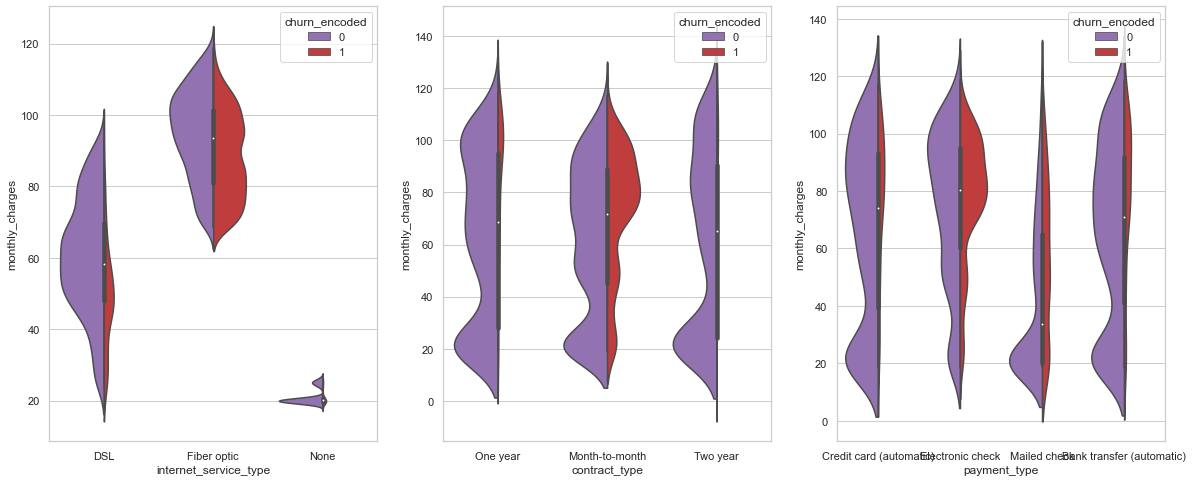

In [85]:
#shows that there is a higher cost of service for fiber optic, high churn, my guess is those are month to month paid with echeck
features = ['internet_service_type', 'contract_type', 'payment_type']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "monthly_charges",
        hue="churn_encoded",
        data=train,
        split=True,
        scale = 'count',
        ax=ax[i],
        palette=["tab:purple", "tab:red"],
    )

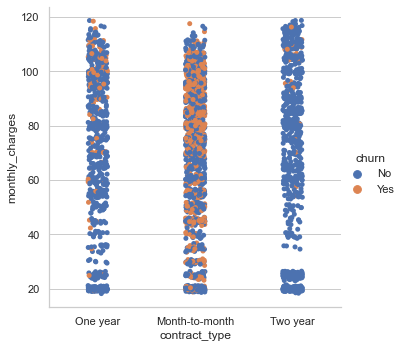

In [86]:
# Using a Catplot, month to month with charges over 60, high churn
sns.catplot(x="contract_type", y="monthly_charges", data=train, hue="churn")

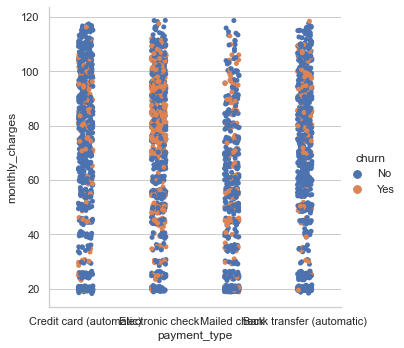

In [87]:
electronic check with charges over 60, high churn
sns.catplot(x="payment_type", y="monthly_charges", data=train, hue="churn")

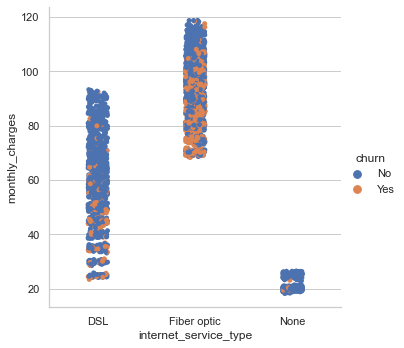

In [88]:
# Using a Catplot
sns.catplot(x="internet_service_type", y="monthly_charges", data=train, hue="churn")

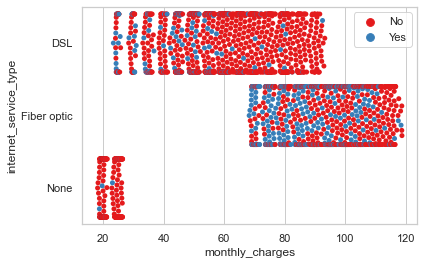

In [99]:
sns.swarmplot(x="monthly_charges", y="internet_service_type", data=train, hue="churn", palette="Set1")
plt.legend()

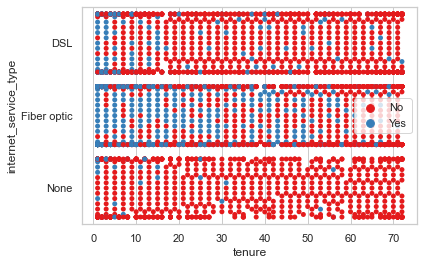

In [100]:
sns.swarmplot(x="tenure", y="internet_service_type", data=train, hue="churn", palette="Set1")
plt.legend()

(0.0, 73.0)

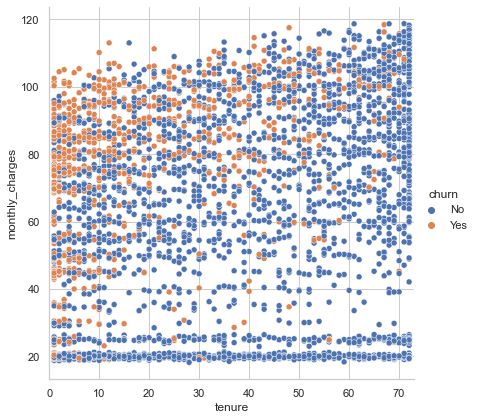

In [152]:
#churn is happening sub 10 month tenure, meaning month to month contract has highest churn
sns.relplot(x="tenure", y="monthly_charges", hue="churn", data=train, height=6, aspect=1)
plt.xlim(0, 73)

(0.0, 73.0)

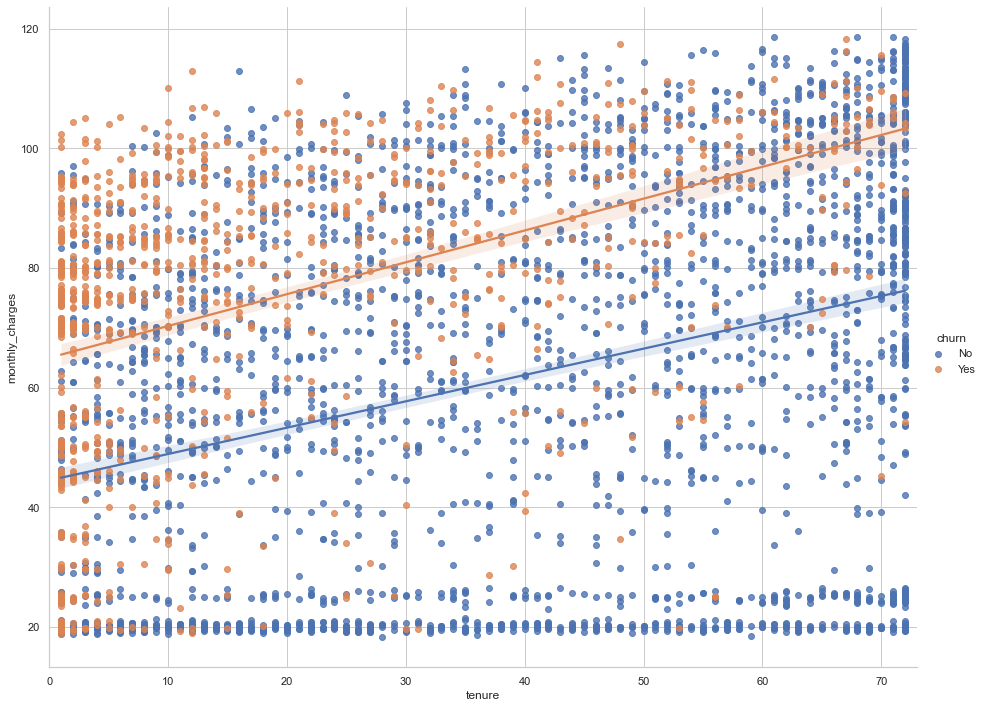

In [150]:
sns.lmplot(x="tenure", y="monthly_charges", hue="churn", data=train, height=10, aspect=1.3)
plt.xlim(0, 73)

In [153]:
# Melt the dataset to "long-form" representation
melt = train[['churn', 'tenure', 'monthly_charges']].melt(id_vars=["churn","tenure"], var_name="measurement")
melt

,churn,tenure,measurement,value
0,No,58,monthly_charges,71.10
1,No,71,monthly_charges,85.45
2,No,35,monthly_charges,25.75
3,No,1,monthly_charges,19.20
4,No,20,monthly_charges,54.00
...,...,...,...,...
3932,No,24,monthly_charges,88.95
3933,Yes,10,monthly_charges,100.25
3934,No,22,monthly_charges,25.25
3935,No,22,monthly_charges,89.10


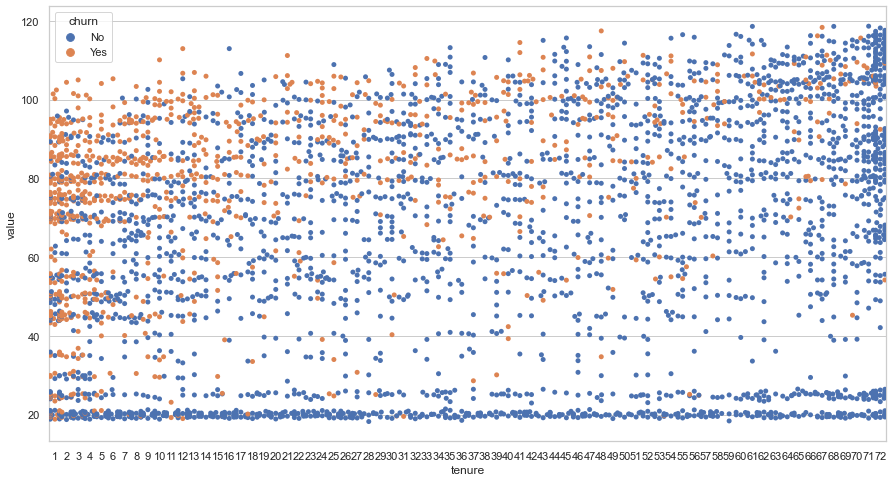

In [156]:
plt.figure(figsize=(15,8))
p = sns.swarmplot(
    x="tenure",
    y="value",
    hue="churn",
    data=melt,
)


In [115]:
pd.crosstab(train.churn, train.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.181102,0.19050,0.179832,0.182880,0.734315
Yes,0.037846,0.03683,0.147574,0.043434,0.265685
All,0.218948,0.22733,0.327407,0.226314,1.000000


In [114]:
pd.crosstab(train.churn, train.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.314453,0.184404,0.235458,0.734315
Yes,0.235458,0.022606,0.007620,0.265685
All,0.549911,0.207010,0.243078,1.000000


In [113]:
pd.crosstab(train.churn, train.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.279655,0.250699,0.203962,0.734315
Yes,0.062738,0.186690,0.016256,0.265685
All,0.342393,0.437389,0.220218,1.000000


In [ ]:
# Statistical Testing

# Experiments should be reproducible: If someone runs through the experiment with the same data, they should get the same results. If someone runs through the experiment with another sample of the data, they should arrive at the same conclusion.
# Experiments should be documented succintly and focusing on the essential aspects of the tasks involved.
# Experiment: Compare two groups: Is the age of survivors significantly different from that of the non-survivors?

# Ho: the difference in age between subset A, survivors, and subset B, non-survivors, is insubstantial (basically 0).
# Ha: the difference between subset A, survivors, and subset B, non-survivors is substantial
# Test if the observations with survivors (subset A) has significantly different ages than that of non-survivors (subset B).
# If there is a difference, then Age is a good choice to keep as a feature.
# We can use a t-test here, as Age is somewhat normally distributed.

In [ ]:
# Types of Distributions
# Uniform distributions have equal likelyhoods amont all outcomes, like a fair coin.
# Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example
# Normal distributions model a continuous random variable.
# Poisson distributions a certain amount of events occuring over a time interval
 
# Working With Distribution Objects from scipy.stats
# Consider the situation at hand and determine the appropriate distribution type.
# Create the distribution object using the stats module from scipy.
# Ask yourself what information you have and what information you need.
# Utilize the diagram below to call the appropriate distribution. Hey Python, you do the calculus!
# Because these distribution objects represent the distribution itself and not specific numbers, use the 
# rvs method if you need to generate actual random numbers (for visualizing or using to produce simulation experiments)

In [ ]:
def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table)

In [ ]:
def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

In [ ]:
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

In [ ]:
def explore_bivariate_categorical(train, target, cat_var):
    '''
    takes in categorical variable and binary target variable, 
    returns a crosstab of frequencies
    runs a chi-square test for the proportions
    and creates a barplot, adding a horizontal line of the overall rate of the target. 
    '''
    print(cat_var, "\n_____________________\n")
    ct = pd.crosstab(train[cat_var], train[target], margins=True)
    chi2_summary, observed, expected = run_chi2(train, cat_var, target)
    p = plot_cat_by_target(train, target, cat_var)
    
    print(chi2_summary)
    print("\nobserved:\n", ct)
    print("\nexpected:\n", expected)
    plt.show(p)
    print("\n_____________________\n")

In [ ]:
def explore_bivariate_quant(train, target, quant_var):
    '''
    descriptive stats by each target class. 
    compare means across 2 target groups 
    boxenplot of target x quant
    swarmplot of target x quant
    '''
    print(quant_var, "\n____________________\n")
    descriptive_stats = train.groupby(target)[quant_var].describe()
    average = train[quant_var].mean()
    mann_whitney = compare_means(train, target, quant_var)
    plt.figure(figsize=(4,4))
    boxen = plot_boxen(train, target, quant_var)
    swarm = plot_swarm(train, target, quant_var)
    plt.show()
    print(descriptive_stats, "\n")
    print("\nMann-Whitney Test:\n", mann_whitney)
    print("\n____________________\n")

In [ ]:
def run_chi2(train, cat_var, target):
    observed = pd.crosstab(train[cat_var], train[target])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    chi2_summary = pd.DataFrame({'chi2': [chi2], 'p-value': [p], 
                                 'degrees of freedom': [degf]})
    expected = pd.DataFrame(expected)
    return chi2_summary, observed, expected

In [ ]:
def plot_cat_by_target(train, target, cat_var):
    p = plt.figure(figsize=(2,2))
    p = sns.barplot(cat_var, target, data=train, alpha=.8, color='lightseagreen')
    overall_rate = train[target].mean()
    p = plt.axhline(overall_rate, ls='--', color='gray')
    return p

In [ ]:
def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

In [ ]:
def plot_swarm(train, target, quant_var):
    average = train[quant_var].mean()
    p = sns.swarmplot(data=train, x=target, y=quant_var, color='lightgray')
    p = plt.title(quant_var)
    p = plt.axhline(average, ls='--', color='black')
    return p

In [ ]:
def compare_means(train, target, quant_var, alt_hyp='two-sided'):
    x = train[train[target]==0][quant_var]
    y = train[train[target]==1][quant_var]
    return stats.mannwhitneyu(x, y, use_continuity=True, alternative=alt_hyp)

In [ ]:
def plot_all_continuous_vars(train, target, quant_vars):
    '''
    Melt the dataset to "long-form" representation
    boxenplot of measurement x value with color representing target. 
    '''
    my_vars = [item for sublist in [quant_vars, [target]] for item in sublist]
    sns.set(style="whitegrid", palette="muted")
    melt = train[my_vars].melt(id_vars=target, var_name="measurement")
    plt.figure(figsize=(8,6))
    p = sns.boxenplot(x="measurement", y="value", hue=target, data=melt)
    p.set(yscale="log", xlabel='')    
    plt.show()

In [ ]:
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

In [ ]:
def plot_swarm_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.swarmplot(x=cat, y=quant, data=train, ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

In [157]:
cat_vars = ['churn', 'contract_type', 'internet_service_type', 'payment_type', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

quant_vars = ['tenure', 'monthly_charges', 'churn_encoded']

In [ ]:
 28  contract_type_One year                 7032 non-null   uint8  
 29  contract_type_Two year                 7032 non-null   uint8  
 30  internet_service_type_Fiber optic      7032 non-null   uint8  
 31  internet_service_type_None             7032 non-null   uint8  
 32  payment_type_Credit card (automatic)   7032 non-null   uint8  
 33  payment_type_Electronic check          7032 non-null   uint8  
 34  payment_type_Mailed check 

In [ ]:
#split the data
train, validate, test = prepare.split_telco_data(df)

In [ ]:
train.head()

In [ ]:
df = prepare.prep_telco_data(df)

In [ ]:
df.head()